**importing important libraries**


In [ ]:
#importing all necessary libraries 
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder



In [ ]:
#reading and initializing dataset
mushroom = pd.read_csv('/content/mushroom edibility classification dataset.csv')
mushroom.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,5.0,2,4.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,1,edible,5.0,2,9.0,bruises is there,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,2,edible,0.0,2,8.0,bruises is there,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,3,poisonous,5.0,3,8.0,bruises is there,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,4,edible,5.0,2,3.0,no bruises,5,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
#seeing how many empty cells are there
mushroom.isnull().sum()

Unnamed: 0                  0
class                       0
cap-shape                   8
cap-surface                 0
cap-color                   8
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#dropping unwanted column as it was of no use.
mushroom = mushroom.drop(['Unnamed: 0'],axis =1)

In [ ]:
#inputing missing values


impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(mushroom[['cap-shape']])

mushroom['cap-shape'] = impute.transform(mushroom[['cap-shape']])


impute2 = SimpleImputer(missing_values=np.nan, strategy='mean')

impute2.fit(mushroom[['cap-color']])

mushroom['cap-color'] = impute2.transform(mushroom[['cap-color']])



In [ ]:
#confirming there is no null
mushroom.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     3124 non-null   object 
 1   cap-shape                 3124 non-null   float64
 2   cap-surface               3124 non-null   int64  
 3   cap-color                 3124 non-null   float64
 4   bruises                   3124 non-null   object 
 5   odor                      3124 non-null   int64  
 6   stalk-shape               3124 non-null   int64  
 7   stalk-root                3124 non-null   int64  
 8   stalk-surface-above-ring  3124 non-null   int64  
 9   stalk-surface-below-ring  3124 non-null   int64  
 10  stalk-color-above-ring    3124 non-null   int64  
 11  stalk-color-below-ring    3124 non-null   int64  
 12  veil-type                 3124 non-null   int64  
 13  veil-color                3124 non-null   int64  
 14  ring-num

In [ ]:
#unique
mushroom['class'].unique
mushroom['bruises'].unique

<bound method Series.unique of 0       bruises is there
1       bruises is there
2       bruises is there
3       bruises is there
4             no bruises
              ...       
3119          no bruises
3120    bruises is there
3121    bruises is there
3122          no bruises
3123    bruises is there
Name: bruises, Length: 3124, dtype: object>

In [ ]:
#encoding


# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "class" column
mushroom['class'] = enc.fit_transform(mushroom['class'])

# Compare the two columns
print(mushroom[['class', ]].head())


# Apply the encoding to the "class" column
mushroom['bruises'] = enc.fit_transform(mushroom['bruises'])

# Compare the two columns
print(mushroom[['bruises', ]].head())

   class
0      1
1      0
2      0
3      1
4      0
   bruises
0        0
1        0
2        0
3        0
4        1


In [ ]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5.0,2,4.0,0,6,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5.0,2,9.0,0,0,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0.0,2,8.0,0,3,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5.0,3,8.0,0,6,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5.0,2,3.0,1,5,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
#determinging features and Lables
X = mushroom[['cap-shape','cap-surface','cap-color','bruises','odor','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']]
Y = mushroom[['class']]

In [ ]:
#splitting dataset into Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2499, 18)
(625, 18)
(2499, 1)
(625, 1)


In [ ]:
scaler = MinMaxScaler() #calling the MinMax scaling algorithm and storing it.
scaler.fit(X_train) #scaling the x training values of the dataset
knn=KNeighborsClassifier() #calling the KNN classifier algorithm and storing it
X_train_scaled = scaler.transform(X_train) #storing the scaled and transformed values of X_train in another varibale

X_test_scaled = scaler.transform(X_test) #storing the scaled and transformed values of X_test in another varibale



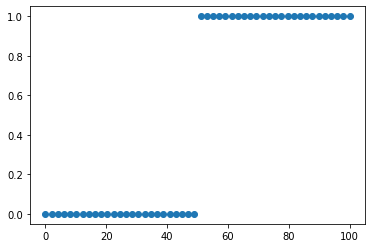

In [ ]:
X = np.linspace(0, 100, 50)
Y = np.zeros(X.size)
Y[25:50] = 1
plt.scatter(X, Y)


In [ ]:
#logestic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, Y_train) #Training our model
predictions = model.predict(X_test_scaled)
print(predictions) #printing prediction

[0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 1 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#see accurancy
from sklearn.metrics import accuracy_score
score1=accuracy_score(Y_test, predictions)
print (score1)

0.9824


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
score2=accuracy_score(y_pred,Y_test)
print(score2)


1.0


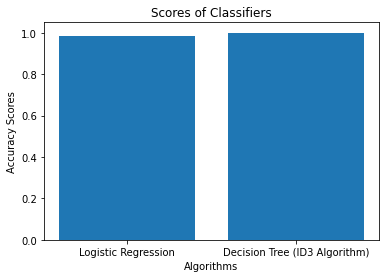

In [ ]:
#plotting bar charts on matplotlib
classifier = ['Logistic Regression', 'Decision Tree (ID3 Algorithm)']
range = [score1, score2]
plt.bar(classifier,range)
plt.title('Scores of Classifiers')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')
plt.show()